# Evolving Niches with Noise
## Comparing fitness levels

This simulation uses one of the runs from the noise-free simulations and evolves it further under noisy conditions.
These populations didn't experience noise until generation 300, at which point constant noise was added to channels 0-2.
The next 300 generations (300-599) were evolved under these noisy conditions.
The final 300 generations were simulated 50 times from the same base run to assess the range of possible responses to noise.

In [18]:
%load_ext autoreload
%autoreload 2

import logging
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%aimport -matplotlib
%aimport -pandas
%aimport -seaborn
%aimport -logging
%aimport -os

import analysis.ks
import dataframe.calculations.spectrum
from dataframe.calculations import specific_generation_over_runs
import visualize.dataframe
plt.style.use(['dark_background'])

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(threadName)s - %(name)s - %(levelname)s - %(message)s')

rootlogger = logging.getLogger()
f = logging.Filter(name='evolvingniches')
logger = logging.getLogger('evolvingniches.run')
rootlogger.addFilter(f)
logger = logging.getLogger('evolvingniches.jupyter')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
directory_base = '/Users/davk/Documents/phd/projects/EvolvingNiches/data/'
directories = ['20D23_g300_c012_i1_600x50', '20D23_g300_c012_i1_600x50_b25', '20D22_g300_c012_i1_600x50']
base_runs = [105, 125, 104]

fitnesses = [pd.read_parquet(os.path.join(directory_base, d, 'species.parquet')) for d in directories]


# Special load for Experiment 1
experiment1 = pd.read_parquet(os.path.join(directory_base, '20D17_nonoise_300x50', 'species.parquet')).reset_index()
experiment1['generation'] += 300
experiment1 = experiment1.set_index(['run','generation','species','role'])

# Special load for Experiment 2
experiment2 = pd.read_parquet(os.path.join(directory_base, '20D17_g0_c012_i1_300x50', 'species.parquet')).reset_index()
experiment2['generation'] += 300
experiment2 = experiment2.set_index(['run','generation','species','role'])

print('Done')
fitnesses.append(experiment1)
fitnesses.append(experiment2)

Done


Plotting


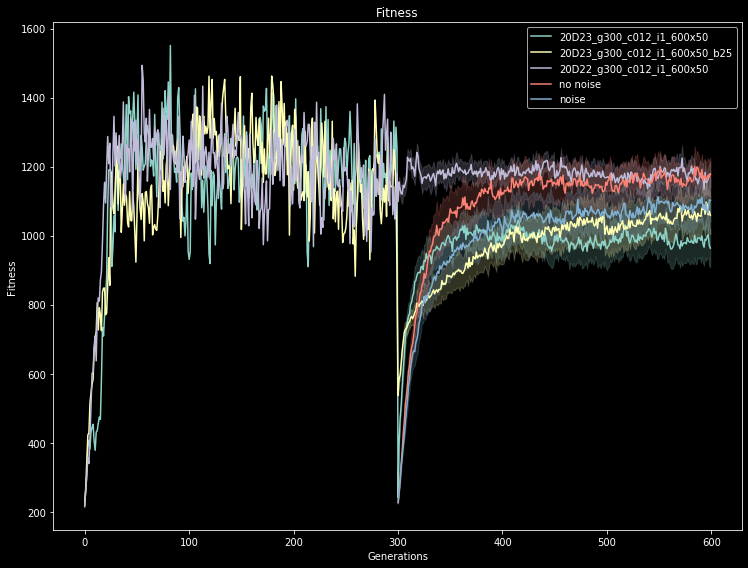

In [20]:
print('Plotting')

for d,fitness in zip(directories + ['no noise', 'noise'],fitnesses):
    visualize.dataframe.plot_species_fitness(fitness, species=0, role='sender', only_mean=True, view=False, filename=None, close=False, label=d)

plt.legend()
plt.show()


Plotting


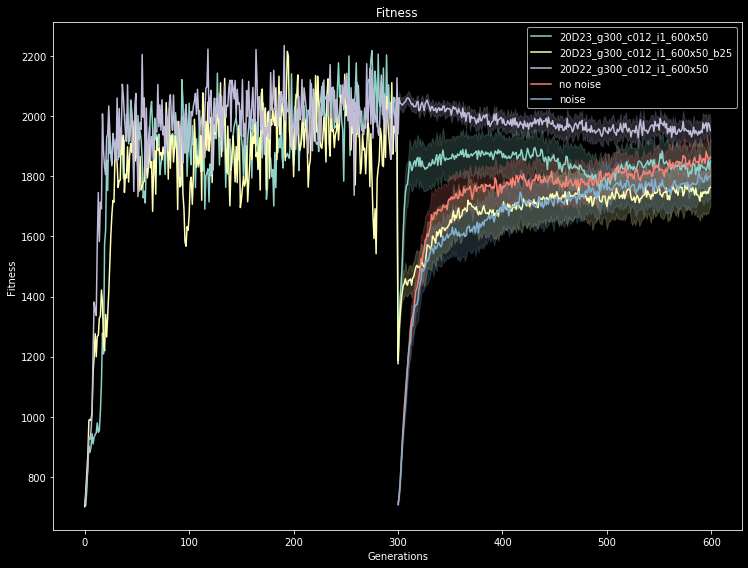

In [21]:
print('Plotting')

for d,fitness in zip(directories + ['no noise', 'noise'],fitnesses):
    visualize.dataframe.plot_species_fitness(fitness, species=0, role='receiver', only_mean=True, view=False, filename=None, close=False, label=d)

plt.legend()
plt.show()



Plotting


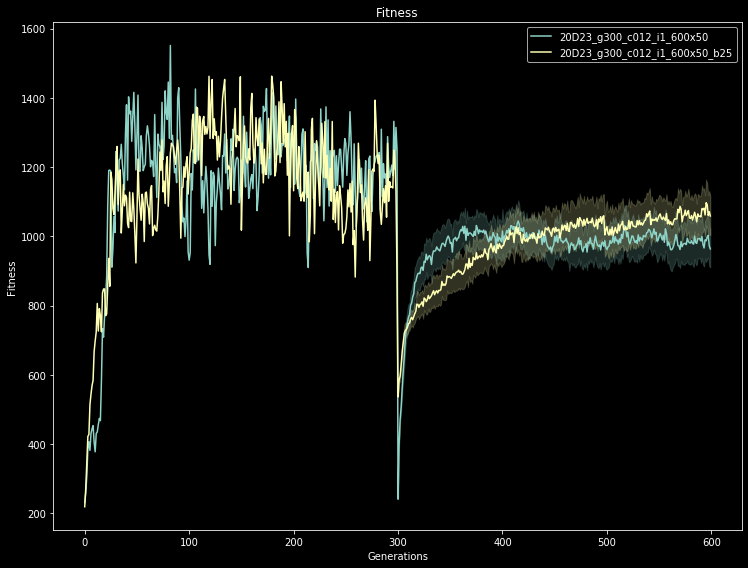

In [22]:
print('Plotting')

for d,fitness in zip(directories[:2],fitnesses[:2]):
    visualize.dataframe.plot_species_fitness(fitness, species=0, role='sender', only_mean=True, view=False, filename=None, close=False, label=d)

plt.legend()
plt.show()


Plotting


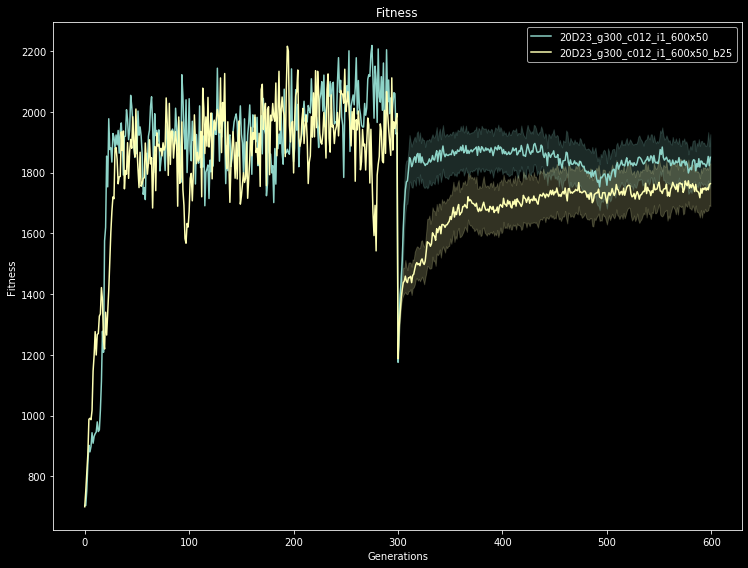

In [23]:
print('Plotting')

for d,fitness in zip(directories[:2],fitnesses[:2]):
    visualize.dataframe.plot_species_fitness(fitness, species=0, role='receiver', only_mean=True, view=False, filename=None, close=False, label=d)

plt.legend()
plt.show()